# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Importing

In [2]:
df_countries = pd.read_csv('Country-data.csv')

In [3]:
#checking sample data
df_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#getting an idea of the columns of the dataset
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
#getting an idea of the rows and columns of the dataset
df_countries.shape

(167, 10)

# Data preparation

In [6]:
# There are no rows which are duplicated
df_countries.duplicated().sum()

0

In [7]:
# There are no missing values
df_countries.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
#Checking for outliers of the numerical columns and the various percentiles
df_countries.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [9]:
#sample data to check whether the columns have continuous data or categorical
# all are continuous
df_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
#Setting the index to country since that is unique
df_countries = df_countries.set_index('country')

In [11]:
#sample 5 rows of the dataset
df_countries.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Converting the below columns to actual values since they are represented in terms of %ages

In [12]:
df_countries['exports'] = df_countries['exports']*df_countries['gdpp']/100
df_countries['imports'] = df_countries['imports']*df_countries['gdpp']/100
df_countries['health'] = df_countries['health']*df_countries['gdpp']/100

# Univariate analysis using seaborn distplot and boxplot

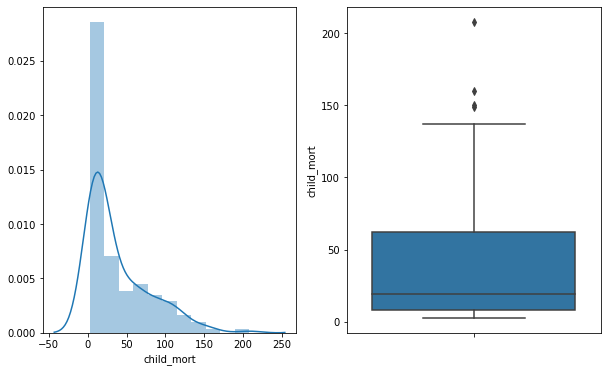

In [13]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df_countries['child_mort'])
plt.subplot(1,2,2)
sns.boxplot(y=df_countries['child_mort'])

### Child mortality is normally distributed and has median at 19 also has a couple of outliers. Maximum occurrences occur between 0-20 range

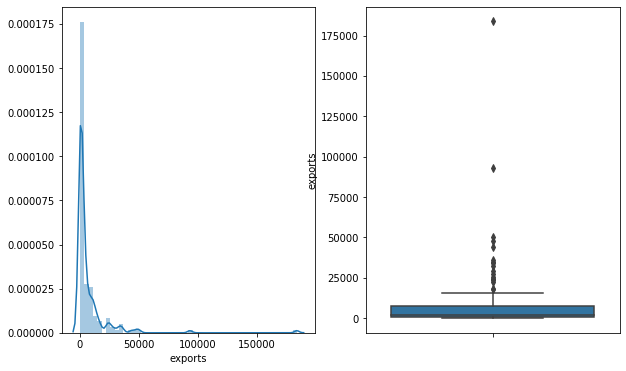

In [14]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df_countries['exports'])
plt.subplot(1,2,2)
sns.boxplot(y=df_countries['exports'])

### Exports is normally distributed and has median at 35 also has 5 outliers. Maximum occurrences occur between 20-30 range

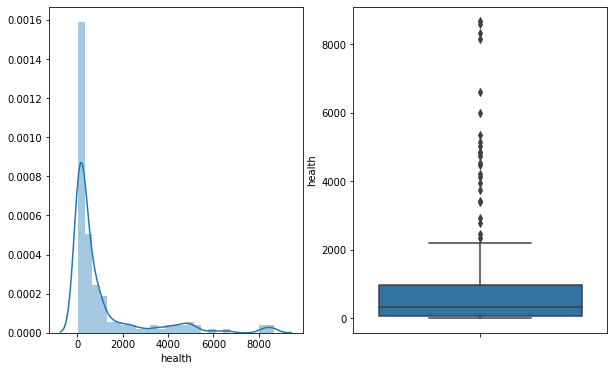

In [15]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df_countries['health'])
plt.subplot(1,2,2)
sns.boxplot(y=df_countries['health'])

### Health is normally distributed and has median at 6 also has a couple of outliers. Maximum occurrences occur between 4-6 range

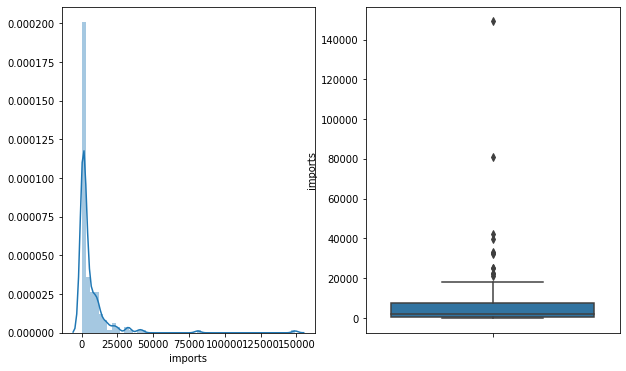

In [16]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df_countries['imports'])
plt.subplot(1,2,2)
sns.boxplot(y=df_countries['imports'])

### Imports is normally distributed and has median at 43 also has 4 outliers. Maximum occurrences occur between 20-30 range

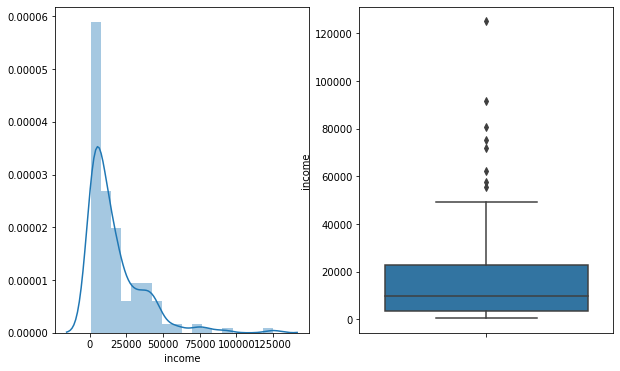

In [17]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df_countries['income'])
plt.subplot(1,2,2)
sns.boxplot(y=df_countries['income'])

### Income is normally distributed and has median at 9960 also has a couple of outliers. Maximum occurrences occur between 0-5000 range

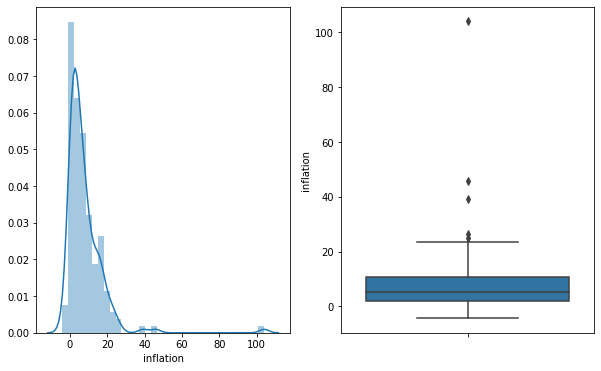

In [18]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df_countries['inflation'])
plt.subplot(1,2,2)
sns.boxplot(y=df_countries['inflation'])

### Inflation is normally distributed and has median at 5 also has some outliers. Maximum occurrences occur between 0-5 range

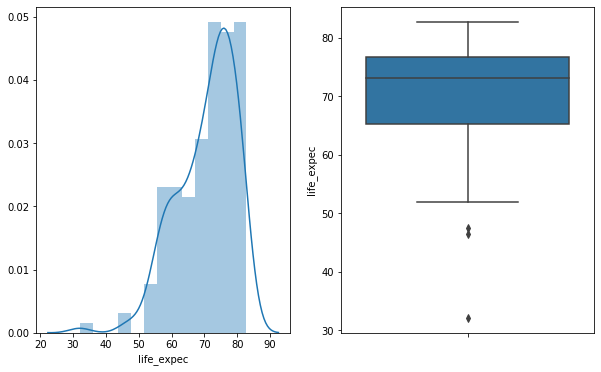

In [19]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df_countries['life_expec'])
plt.subplot(1,2,2)
sns.boxplot(y=df_countries['life_expec'])

### expectancy is left skewed and has median at 73 also has a couple of outliers on the lower end. Maximum occurrences occur between 70-80 range

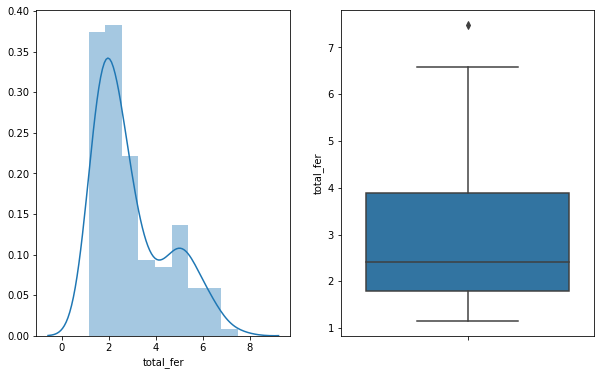

In [20]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df_countries['total_fer'])
plt.subplot(1,2,2)
sns.boxplot(y=df_countries['total_fer'])

### Fertility Rate is normally distributed and has median at 2.41 also has a outlier. Maximum occurrences occur between 1-4 range

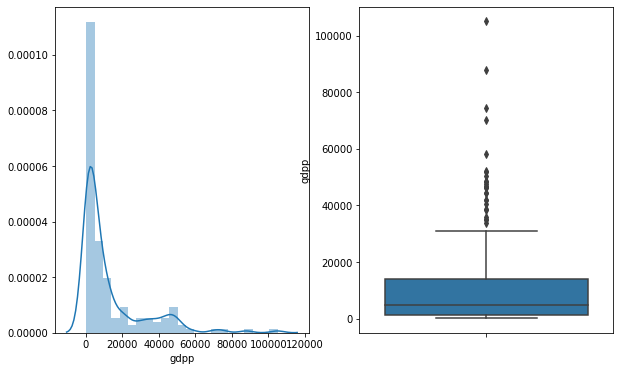

In [21]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df_countries['gdpp'])
plt.subplot(1,2,2)
sns.boxplot(y=df_countries['gdpp'])

### gdpp is normally distributed and has median at 4460 also has a lot of outliers. Maximum occurrences occur between 0-10000 range

# Bivariate Analysis using pairplot

<Figure size 1800x1800 with 0 Axes>

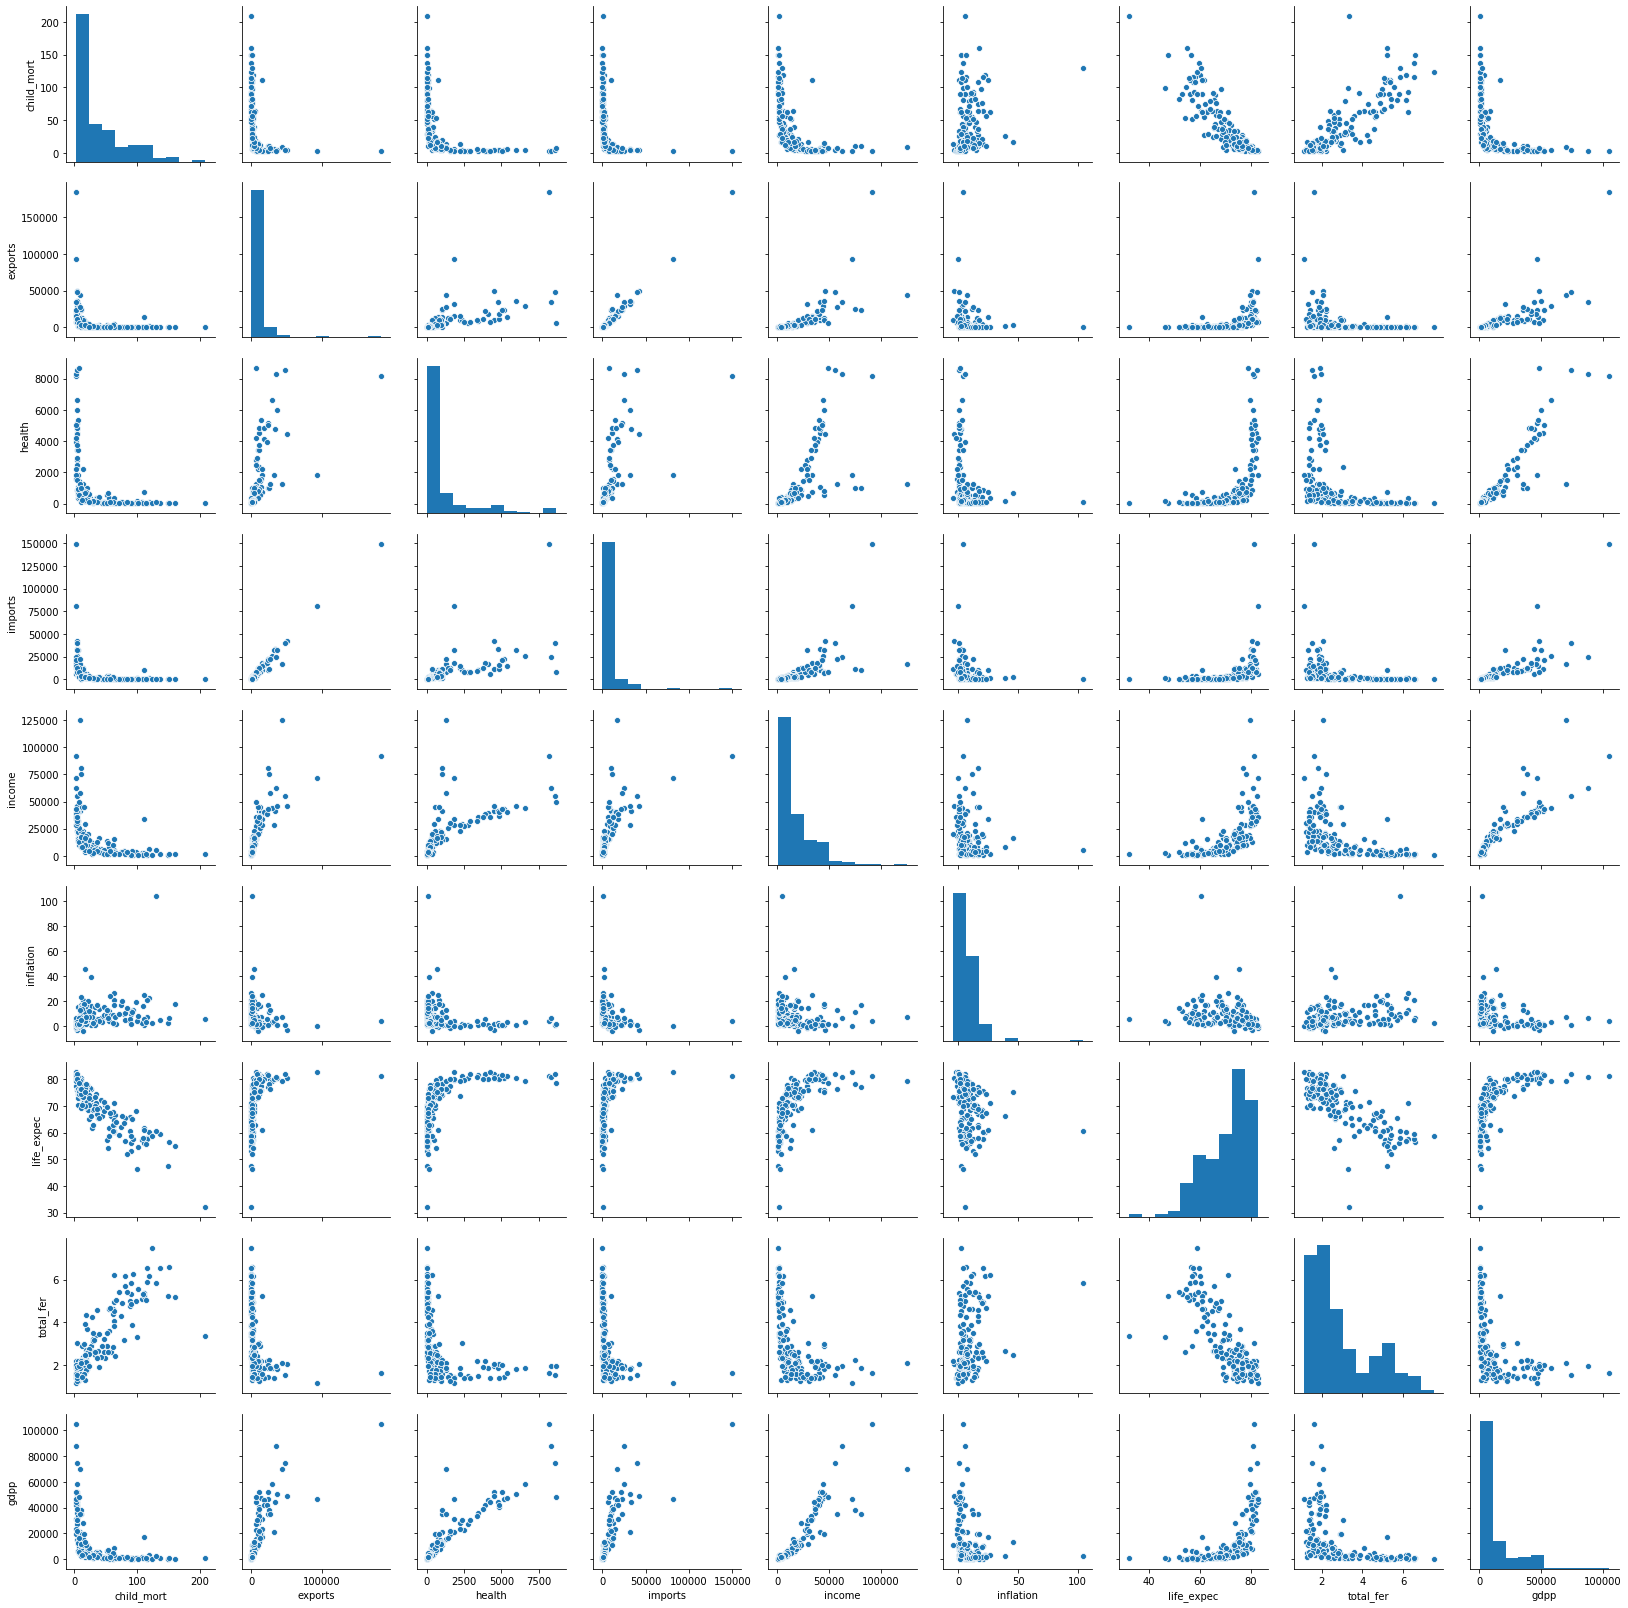

In [22]:
plt.figure(figsize = (25,25))
sns.pairplot(df_countries)

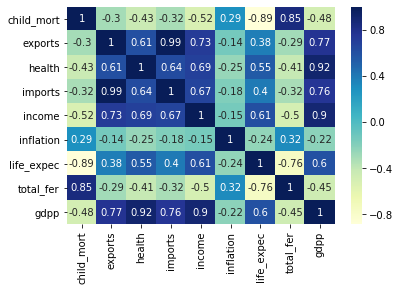

In [23]:
sns.heatmap(df_countries.corr(), annot = True, cmap="YlGnBu")

### Findings:
#### 1. gdpp is highly correlated with Income
#### 2. child_mortality is highly correlated with total fertility
#### 3. child mortality is highly negatively correlated with life expectancy
#### 4. Imports is correlated with exports
#### 5. Health and imports has no relation
#### 6. Life expectancy and imports has no correlation

# Outlier Treatment

In [24]:
df_countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


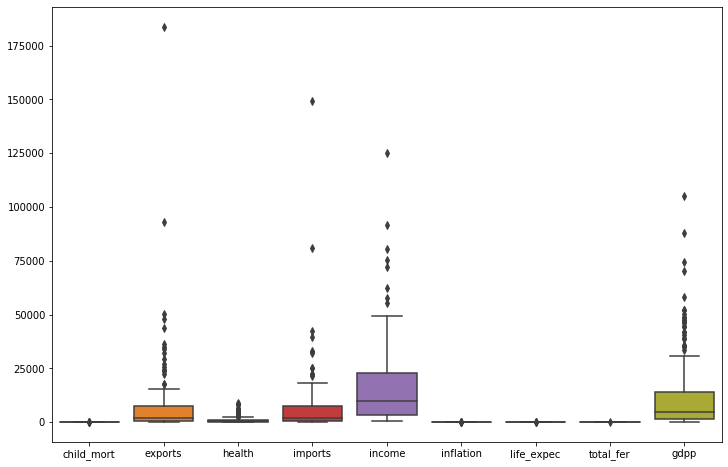

In [25]:
# Lots of outliers
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=df_countries)
plt.show()

In [26]:
#Outlier removal using Inter-quartile range
df_no_out = df_countries.copy()
for i, var in enumerate(df_no_out.columns):
    Q1 = df_no_out[var].quantile(0.25)
    Q3 = df_no_out[var].quantile(0.75)
    IQR = Q3 - Q1
    df_no_out = df_no_out[(df_no_out[var] >= Q1 - 2*IQR) & (df_no_out[var] <= Q3 + 2*IQR)]

In [27]:
#Checking the percentiles of the numerical data after outlier treatment
df_no_out.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000
mean,47.106667,1636.625179,270.293332,1805.972651,8128.358333,7.93070,67.951667,3.307167,4115.600000
std,38.120291,1848.442592,280.510138,1793.301140,6467.399070,6.21785,7.708044,1.557084,3726.122899
min,5.500000,1.076920,12.821200,0.651092,609.000000,-0.81200,46.500000,1.270000,231.000000
25%,17.050000,236.792250,53.437125,392.523750,2425.000000,2.82250,61.775000,2.077500,997.000000
50%,33.400000,968.475000,172.880000,1300.575000,6570.000000,6.48000,69.650000,2.690000,3015.000000
75%,68.075000,2232.327500,391.370500,2506.425000,12750.000000,11.72500,74.250000,4.625000,6235.000000
90%,108.100000,4408.080000,661.150000,4233.864000,17820.000000,16.60000,76.610000,5.443000,10340.000000
95%,116.150000,5556.250000,896.108000,5378.349000,20100.000000,20.70500,77.805000,6.163500,12005.000000
99%,149.810000,7873.122300,1043.655600,7676.822000,22853.000000,23.44800,79.667000,6.582400,13386.000000


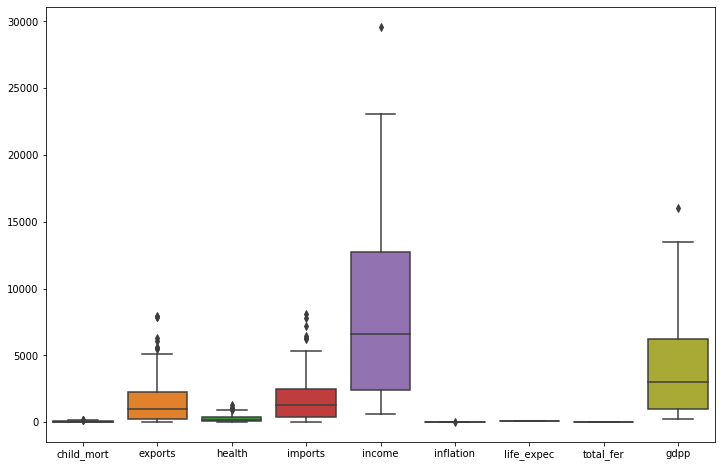

In [28]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=df_no_out)
plt.show()

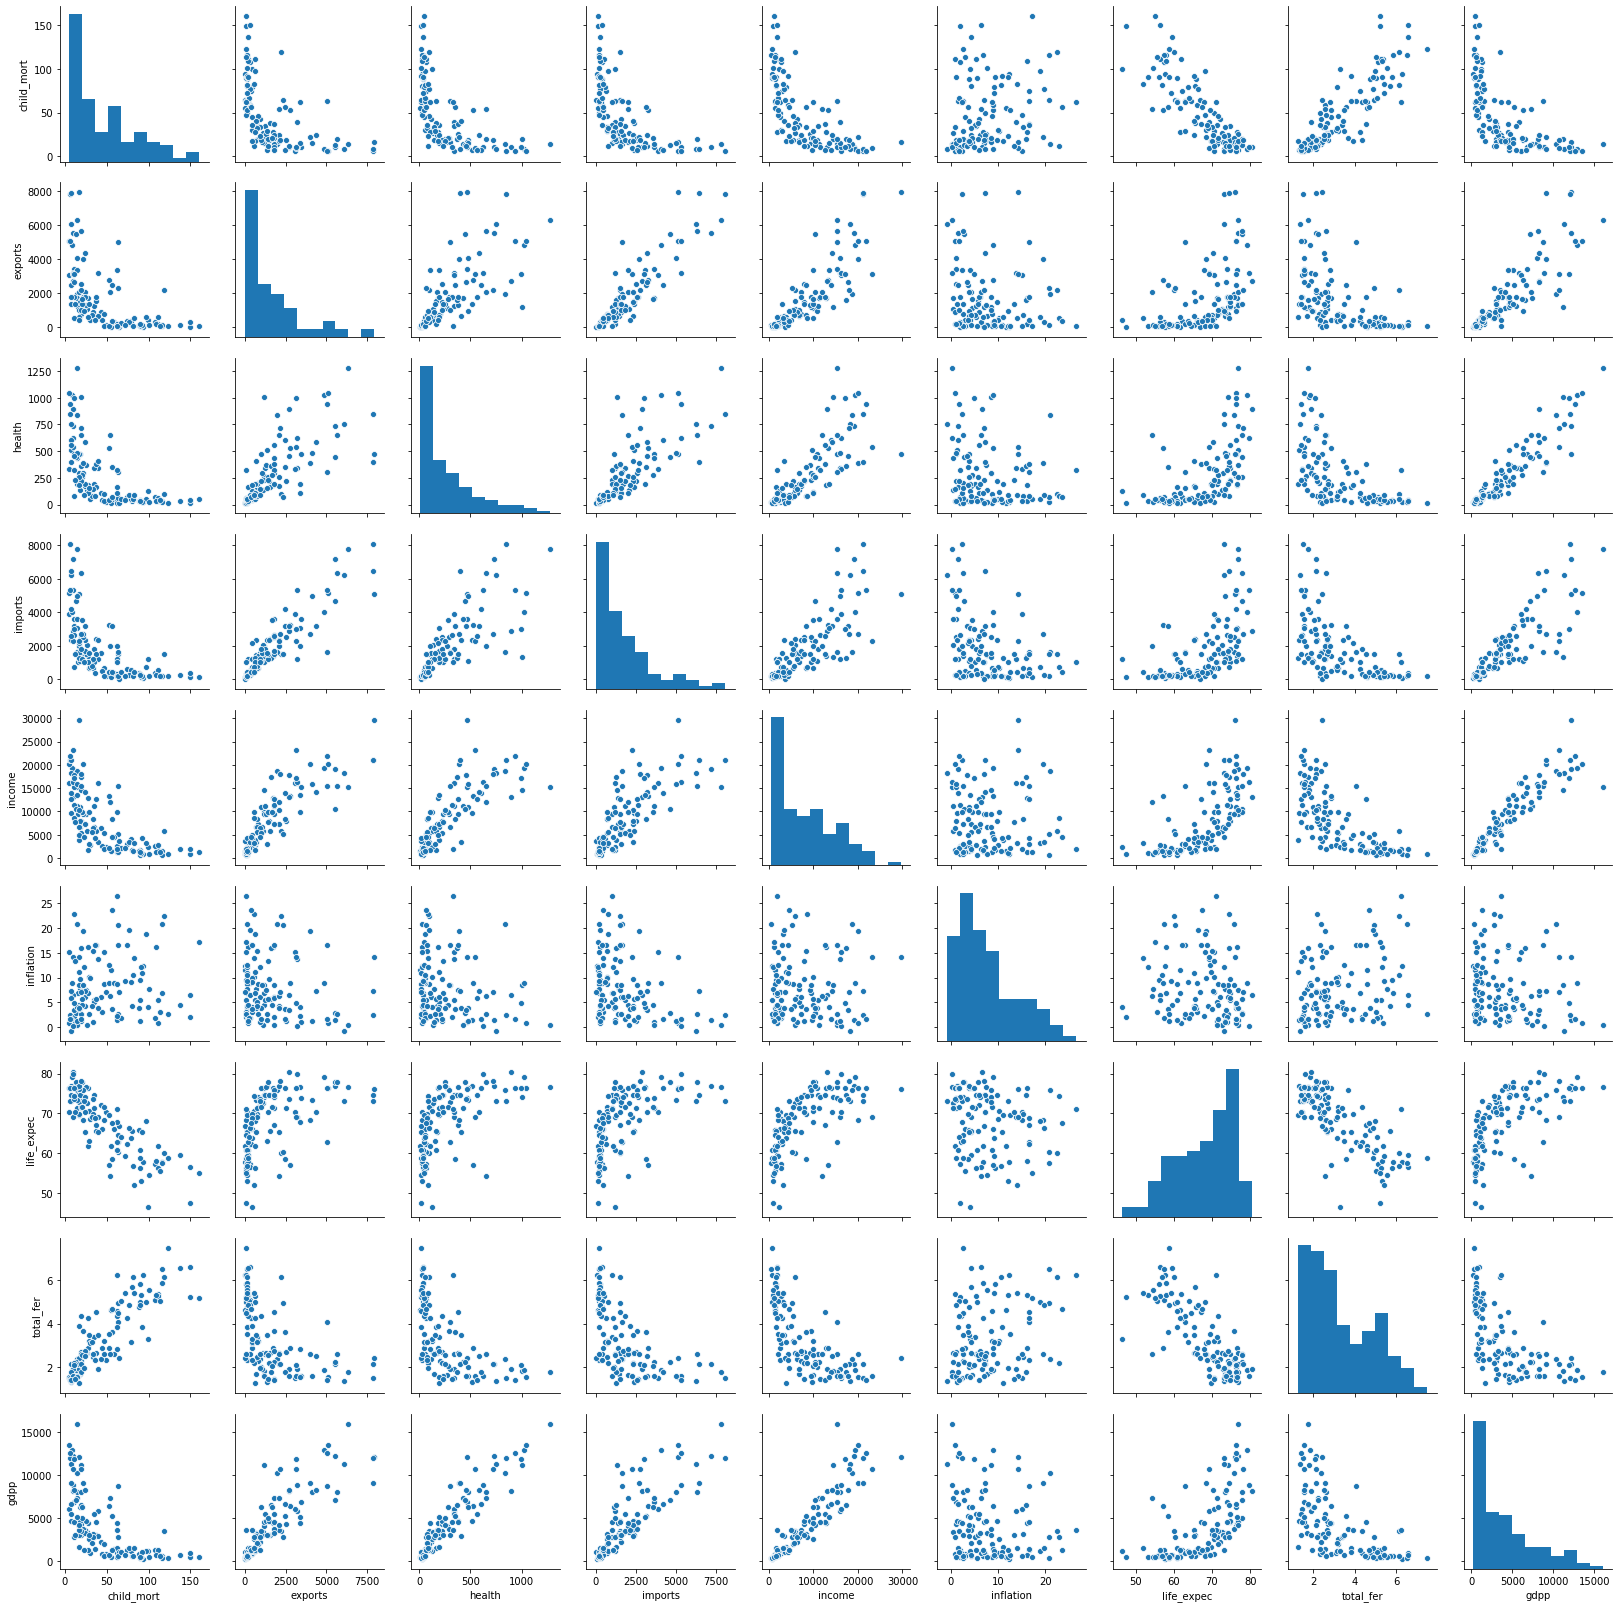

In [29]:
#pairplot to see if the correlations remain the same
sns.pairplot(df_no_out)

In [30]:
#sample data from dataset after outlier treatment
df_no_out.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# Feature scaling using Standard Scaler

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scl = scaler.fit_transform(df_no_out)

In [32]:
# Creating a new dataframe with scaled data and all the outlier treated column names
df_s = pd.DataFrame(scl,columns=df_no_out.columns,index=df_no_out.index)

In [33]:
#sample dataset of scaled data
df_s.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.135196,-0.859078,-0.817559,-0.872250,-1.012105,0.243754,-1.530990,1.620574,-0.960123
Albania,-0.803629,-0.266974,-0.008586,0.101784,0.279741,-0.555679,1.087609,-1.068738,-0.006899
Algeria,-0.521762,0.041296,-0.301825,-0.227086,0.740893,1.319355,1.113665,-0.269039,0.092816
Angola,1.893867,0.305621,-0.607464,-0.163288,-0.345997,2.336816,-1.022904,1.839847,-0.157820
Antigua and Barbuda,-0.969588,2.126540,1.665957,3.012536,1.703567,-1.048259,1.152748,-0.759177,2.178752


In [34]:
df_s.shape

(120, 9)

In [35]:
#Percentiles values of numerical data after scaling is completed
df_s.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,-7.308968e-17,-7.401487e-18,-8.789266e-17,1.850372e-18,-4.348374e-17,1.295260e-17,1.669035e-15,-9.992007e-17,-1.110223e-16
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.096034e+00,-8.885350e-01,-9.217196e-01,-1.010924e+00,-1.167531e+00,-1.411960e+00,-2.794692e+00,-1.313808e+00,-1.046903e+00
25%,-7.917749e-01,-7.604793e-01,-7.763194e-01,-7.914874e-01,-8.855603e-01,-8.249826e-01,-8.046872e-01,-7.930354e-01,-8.404650e-01
50%,-3.610711e-01,-3.629821e-01,-3.487281e-01,-2.830070e-01,-2.419663e-01,-2.342904e-01,2.212564e-01,-3.980225e-01,-2.966125e-01
75%,5.523633e-01,3.236238e-01,4.334418e-01,3.922315e-01,7.176022e-01,6.127856e-01,8.205378e-01,8.498958e-01,5.711799e-01
90%,1.606731e+00,1.505632e+00,1.399220e+00,1.359544e+00,1.504821e+00,1.400106e+00,1.127995e+00,1.377440e+00,1.677480e+00
95%,1.818791e+00,2.129392e+00,2.240342e+00,2.000420e+00,1.858836e+00,2.063070e+00,1.283678e+00,1.842104e+00,2.126199e+00
99%,2.705487e+00,3.388066e+00,2.768545e+00,3.287493e+00,2.286295e+00,2.506069e+00,1.526257e+00,2.112260e+00,2.498380e+00


# PCA Application

In [36]:
# running PCA for all principal components and random state = 42
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(df_s)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
#checking the numpy array components
pca.components_

array([[-0.33656019,  0.34901463,  0.35593869,  0.36235485,  0.37558776,
        -0.10456286,  0.31824872, -0.32978621,  0.38063353],
       [ 0.47333691,  0.37523107,  0.22312047,  0.27848233,  0.13238706,
        -0.02408559, -0.47752846,  0.44651886,  0.24959904],
       [-0.02010322,  0.0569829 ,  0.01583568, -0.13401389,  0.20280783,
         0.95931615,  0.06360686,  0.05330491,  0.09915934],
       [ 0.09802861, -0.52137181,  0.6995306 , -0.35523897, -0.02678942,
        -0.06080204,  0.03922854,  0.08534033,  0.29964583],
       [-0.03489424, -0.05164778, -0.01003592, -0.17823414,  0.20853422,
         0.01318779, -0.71150496, -0.64293861,  0.03125659],
       [ 0.40770967,  0.08834231, -0.29668105, -0.48239801,  0.60308274,
        -0.21706908,  0.28432621, -0.00870967,  0.11617202],
       [ 0.69209758,  0.01047488,  0.12462879,  0.24293623, -0.286763  ,
         0.12687811,  0.27769849, -0.51037679, -0.10202393],
       [-0.07809373,  0.66048547,  0.18985101, -0.56849821, -0

In [38]:
#checking the variance explaining principal components
pca.explained_variance_ratio_

array([0.67416896, 0.11697635, 0.11144655, 0.03596754, 0.0265451 ,
       0.01673189, 0.01107162, 0.00491586, 0.00217613])

In [39]:
#checking the cumulative variances for the principal components
varcumu = np.cumsum(pca.explained_variance_ratio_)

In [40]:
varcumu

array([0.67416896, 0.79114532, 0.90259186, 0.9385594 , 0.96510451,
       0.9818364 , 0.99290801, 0.99782387, 1.        ])

## Selecting number of principal components to be 5 which explains variance of 98%

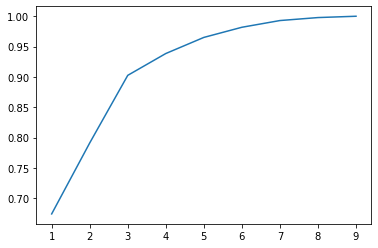

In [41]:
# Drawing the scree plot to identify the # of principal components
# shows the flatlining occurs at PC5
sns.lineplot(y = np.cumsum(pca.explained_variance_ratio_), x = range(1,len(df_s.columns)+1))

In [42]:
columns = list(df_s.columns)
df_pca = pd.DataFrame({ 'Feature':columns,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'PC5':pca.components_[4]})
df_pca

,Feature,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.336560,0.473337,-0.020103,0.098029,-0.034894
1,exports,0.349015,0.375231,0.056983,-0.521372,-0.051648
2,health,0.355939,0.223120,0.015836,0.699531,-0.010036
3,imports,0.362355,0.278482,-0.134014,-0.355239,-0.178234
4,income,0.375588,0.132387,0.202808,-0.026789,0.208534
5,inflation,-0.104563,-0.024086,0.959316,-0.060802,0.013188
6,life_expec,0.318249,-0.477528,0.063607,0.039229,-0.711505
7,total_fer,-0.329786,0.446519,0.053305,0.085340,-0.642939
8,gdpp,0.380634,0.249599,0.099159,0.299646,0.031257


## Plotting scatter plot between PC1 and PC2

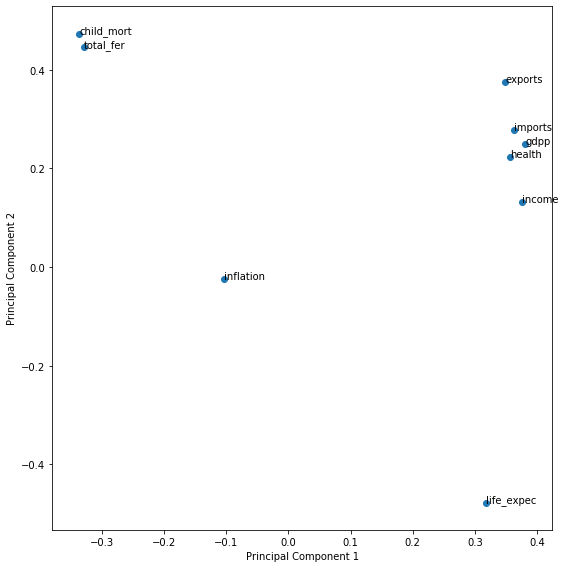

In [43]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_pca.PC1, df_pca.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(df_pca.Feature):
    plt.annotate(txt, (df_pca.PC1[i],df_pca.PC2[i]))
plt.tight_layout()
plt.show()

In [44]:
# Drawing the threshold at 98% and checking the shape whether the # of columns have 5 principal components
pca_threshold = PCA(n_components = 5, random_state=42)
df_pca_threshold = pca_threshold.fit_transform(df_s)
df_pca_threshold.shape

(120, 5)

## Checking whether creating principal components reduces the correlation amongts the new PC

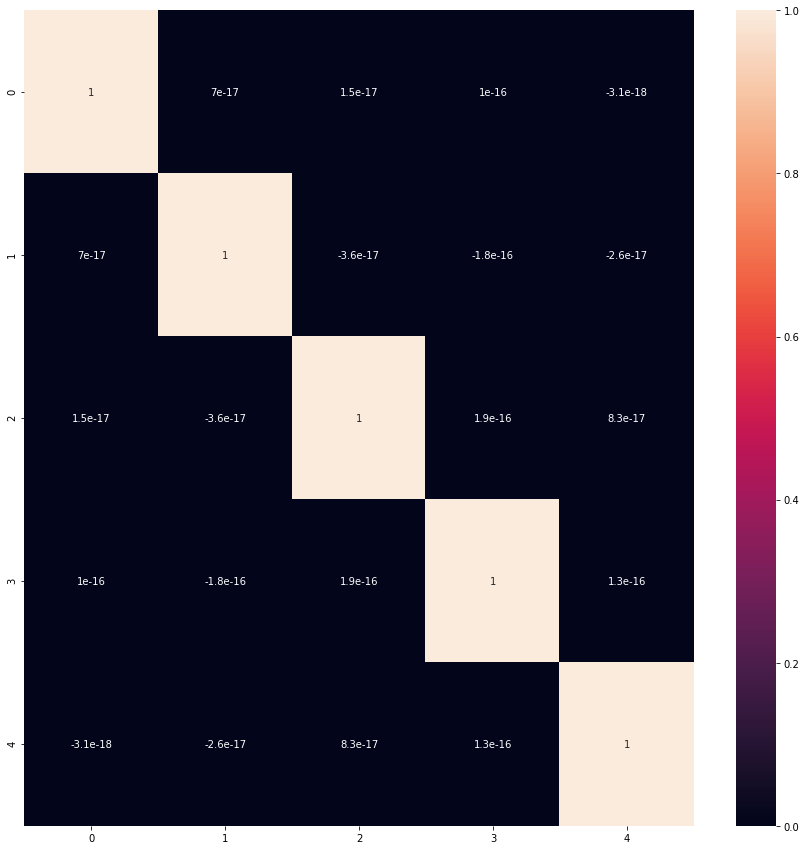

In [45]:
coormat = np.transpose(df_pca_threshold)
comatrix = np.corrcoef(coormat)
# all parameters are uncorrelated and explain high amount of variance
plt.figure(figsize=(15,15))
sns.heatmap(comatrix,annot=True)

In [46]:
# Creating a new dataframe with data from the above PCA and adding appropriate column labels
df_pca_threshold = pd.DataFrame(df_pca_threshold, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index = df_s.index)

In [47]:
# sample data of the new dataset
df_pca_threshold.head()

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.081713,0.864859,-0.045454,0.099968,-0.022049
Albania,1.070248,-1.402015,-0.477645,-0.006066,-0.012139
Algeria,0.619092,-0.924520,1.520132,-0.254672,-0.385023
Angola,-2.172784,1.998616,2.180540,-0.403840,-0.548045
Antigua and Barbuda,4.949085,1.454785,-0.647888,-0.457163,-0.552208


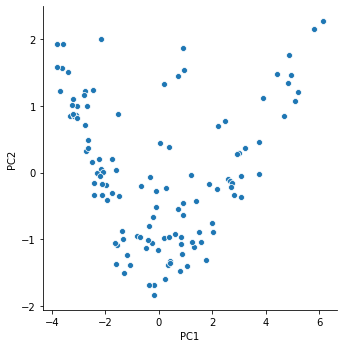

In [48]:
sns.pairplot(data = df_pca_threshold,x_vars='PC1', y_vars='PC2',size=5)

### Checking outliers for all principal components

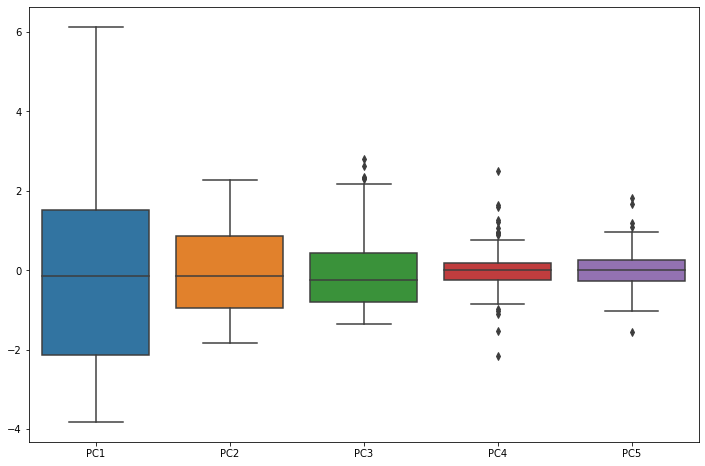

In [49]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=df_pca_threshold)
plt.show()

# Perform Clustering

In [50]:
# Checking hopkins measure
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [51]:
hopkins(df_pca_threshold)

0.7161580355677505

In [52]:
df_pca_threshold.shape

(120, 5)

# Value is > 0.5 the given dataset has a good tendency to form clusters.

In [ ]:
# sum of squared distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df_pca_threshold)
    sse.append([k, silhouette_score(df_pca_threshold, kmeans.labels_)])

In [ ]:
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1])
plt.show()

In [ ]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca_threshold)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init = 50).fit(df_pca_threshold)
    silhouette_avg = silhouette_score(df_pca_threshold, kmeans.labels_)
    print("For number of clusters {0}, the silhouette score is {1}".format(k,silhouette_avg))


In [ ]:
# Checking right cumber of clusters through hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
#Not good linkages obtained through single linkages
plt.figure(figsize=(12,8))
mergings = linkage(df_pca_threshold, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
#good linkages obtained through complete linkages
plt.figure(figsize=(12,8))
mergings_complete = linkage(df_pca_threshold, method = "complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

In [ ]:
#average linkages obtained through average linkages
plt.figure(figsize=(12,8))
mergings_avg = linkage(df_pca_threshold, method = "average", metric='euclidean')
dendrogram(mergings_avg)
plt.show()

In [ ]:
# Perform clustering with 4
# Kmeans with K=4
K_means4 = KMeans(n_clusters = 4, max_iter=50)
K_means4.fit(df_pca_threshold)

In [ ]:
df_pca_threshold.head()

In [ ]:
df_s.head()

In [ ]:
#Combining the principal components and original components into 1 dataset
df_final = df_pca_threshold.merge(df_s,on='country')

In [ ]:
df_final.head()

In [ ]:
df_final.shape

In [ ]:
df_final['klabels'] = K_means4.labels_

In [ ]:
df_final.head()

In [ ]:
Hlabels = cut_tree(mergings_complete, n_clusters = 4).reshape(-1,)

In [ ]:
df_final['Hlabels'] = Hlabels

In [ ]:
df_final.head()

In [ ]:
df_final.klabels.value_counts()

In [ ]:
df_final.Hlabels.value_counts()

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.boxplot(x='klabels', y='child_mort',data=df_final)
plt.subplot(3,2,2)
sns.boxplot(x='Hlabels', y='child_mort',data=df_final)
plt.subplot(3,2,3)
sns.boxplot(x='klabels', y='gdpp',data=df_final)
plt.subplot(3,2,4)
sns.boxplot(x='Hlabels', y='gdpp',data=df_final)
plt.subplot(3,2,5)
sns.boxplot(x='klabels', y='exports',data=df_final)
plt.subplot(3,2,6)
sns.boxplot(x='Hlabels', y='exports',data=df_final)

# Cluster1 has high mortality rate as per kmeans
# Cluster2 has high mortality rate as per Hierarchical

In [ ]:
df_final[df_final.klabels==1 & df_final.Hlabels==2]